# 1. Import Library

In [2]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

# 資料準備

In [13]:
cols=['Survived','Pclass','Name','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
all_df = pd.read_csv("data/titanic_train.csv", usecols=cols)
final_test_df = pd.read_csv("data/titanic_test.csv", usecols=cols.remove('Survived'))

In [14]:
all_df[:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [17]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 891 train: 704 test: 187


In [20]:
def PreprocessData(raw_df):
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [21]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [73]:
train_Features[:5]

array([[ 1.        ,  1.        ,  0.29328622,  0.125     ,  0.        ,
         0.01415106,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.51073661,  0.125     ,  0.        ,
         0.13913574,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.34764882,  0.        ,  0.        ,
         0.01546857,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.46996466,  0.125     ,  0.        ,
         0.1036443 ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  1.        ,  0.39681058,  0.        ,  0.        ,
         0.0165095 ,  0.        ,  1.        ,  0.        ]])

# 3. Create Model 

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [28]:
model = Sequential()

In [29]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [30]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [31]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [39]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=50, 
                         batch_size=30,verbose=2)

Train on 633 samples, validate on 71 samples
Epoch 1/50
0s - loss: 0.4246 - acc: 0.8183 - val_loss: 0.4522 - val_acc: 0.7887
Epoch 2/50
0s - loss: 0.4185 - acc: 0.8073 - val_loss: 0.4504 - val_acc: 0.8028
Epoch 3/50
0s - loss: 0.4170 - acc: 0.8183 - val_loss: 0.4502 - val_acc: 0.8028
Epoch 4/50
0s - loss: 0.4173 - acc: 0.8183 - val_loss: 0.4533 - val_acc: 0.7887
Epoch 5/50
0s - loss: 0.4160 - acc: 0.8073 - val_loss: 0.4499 - val_acc: 0.7887
Epoch 6/50
0s - loss: 0.4171 - acc: 0.8104 - val_loss: 0.4513 - val_acc: 0.7887
Epoch 7/50
0s - loss: 0.4161 - acc: 0.8167 - val_loss: 0.4501 - val_acc: 0.7746
Epoch 8/50
0s - loss: 0.4154 - acc: 0.8152 - val_loss: 0.4495 - val_acc: 0.7887
Epoch 9/50
0s - loss: 0.4147 - acc: 0.8136 - val_loss: 0.4484 - val_acc: 0.7887
Epoch 10/50
0s - loss: 0.4132 - acc: 0.8152 - val_loss: 0.4467 - val_acc: 0.7887
Epoch 11/50
0s - loss: 0.4126 - acc: 0.8120 - val_loss: 0.4455 - val_acc: 0.8028
Epoch 12/50
0s - loss: 0.4151 - acc: 0.8073 - val_loss: 0.4411 - val_acc:

# 6. Print History

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

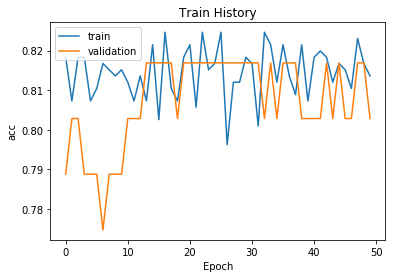

In [41]:
show_train_history(train_history,'acc','val_acc')

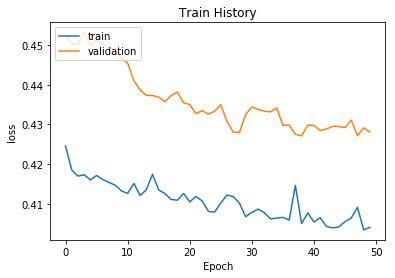

In [42]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [43]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

 32/187 [====>.........................] - ETA: 0s

In [44]:
scores[1]

0.78609625445330211

# 預測資料

In [91]:
cols=['Pclass','Name','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
final_test_df = final_test_df[cols]
final_test_df[:5]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [95]:
def PreprocessFinalData(raw_df):
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures

In [96]:
final_test_features=PreprocessFinalData(final_test_df)

In [97]:
final_test_features[:5]

array([[ 1.        ,  1.        ,  0.4527232 ,  0.        ,  0.        ,
         0.01528158,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.61756561,  0.125     ,  0.        ,
         0.01366309,  0.        ,  0.        ,  1.        ],
       [ 0.5       ,  1.        ,  0.8153765 ,  0.        ,  0.        ,
         0.01890874,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.35381775,  0.        ,  0.        ,
         0.01690807,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.28788079,  0.125     ,  0.11111111,
         0.0239836 ,  0.        ,  0.        ,  1.        ]])

In [98]:
predict = model.predict_classes(final_test_features)

 32/418 [=>............................] - ETA: 0s

In [151]:
pd.DataFrame(predict)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [102]:
raw_test_df = pd.read_csv("data/titanic_test.csv")
result_df = raw_test_df['PassengerId']

In [171]:
passengerId = pd.DataFrame(result_df)
pretict_result = pd.DataFrame(predict)
output_df = passengerId.join(pretict_result)
output_df = output_df.rename(index=str, columns={0: "Survived"})

In [172]:
output_df.to_csv("./data/submission.csv", index=False)